In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from skimage.util import crop
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops, regionprops_table
from skimage.color import label2rgb
from skimage import measure
from skimage.morphology import closing, square, remove_small_objects


%matplotlib inline

In [50]:
File_nam='SUG_20200721_fin001'
image=np.invert(imread(File_nam+'.tif'))

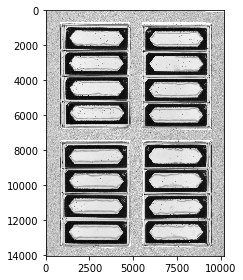

In [51]:
imshow(image)

In [52]:
rows = []
# apply threshold
thresh = threshold_otsu(image)

In [54]:
bw = closing(image > thresh)

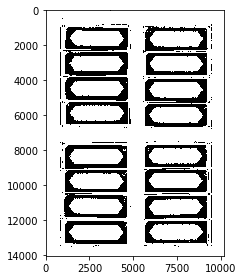

In [55]:
imshow(bw)

In [56]:
# remove artifacts connected to image border
cleared = remove_small_objects(clear_border(bw), 1000000)

In [57]:
# label image regions
label_image = label(cleared)
#image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


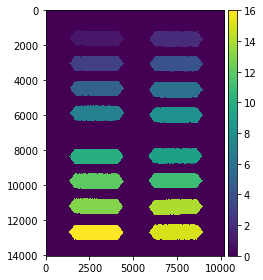

In [58]:
imshow(label_image)

In [59]:
props = regionprops_table(label_image, properties=('label','centroid', 'bbox', 'area'))
dff=pd.DataFrame(props)
df=dff.sort_values(by=['bbox-1'])
df.reset_index(drop=True, inplace=True)

# Sort the plates into the left and right
MinCol=list(df.items())[4][1][7]
mask = df['bbox-1'] > MinCol
df_r = df[mask]
df_l = df[~mask]

## Split the right plates to upper (#1) and lower (#4)
dffr=df_r.sort_values(by=['bbox-0'])
dffr.reset_index(drop=True, inplace=True)
MinCol1=list(dffr.items())[3][1][3]
mask = df_r['bbox-0'] > MinCol1
dff4 = df_r[mask]
dff1 = df_r[~mask]

### Sort the wells on each plate
df1=dff1.sort_values(by=['bbox-0'])
df4=dff4.sort_values(by=['bbox-0'])
df4.reset_index(drop=True, inplace=True)
df1.reset_index(drop=True, inplace=True)

## Split the left plates to upper (#2) and lower (#3)
dffl=df_l.sort_values(by=['bbox-0'])
dffl.reset_index(drop=True, inplace=True)
MinCol2=list(dffl.items())[3][1][3]
mask = df_l['bbox-0'] > MinCol2
dff3 = df_l[mask]
dff2 = df_l[~mask]

### Sort the wells on each plate
df2=dff2.sort_values(by=['bbox-0'])
df3=dff3.sort_values(by=['bbox-0'])
df3.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

## Update the label of each well
new_label_1 = pd.Series(['1P', '1Q','1R','1S'], name='label', index=[0,1,2,3])
df1.update(new_label_1)

new_label_2 = pd.Series(['2P', '2Q','2R','2S'], name='label', index=[0,1,2,3])
df2.update(new_label_2)

new_label_3 = pd.Series(['3P', '3Q','3R','3S'], name='label', index=[0,1,2,3])
df3.update(new_label_3)

new_label_4 = pd.Series(['4P', '4Q','4R','4S'], name='label', index=[0,1,2,3])
df4.update(new_label_4)

### Append the dataframes
df_f=df1.append(df2, ignore_index=True).append(df3, ignore_index=True).append(df4, ignore_index=True)

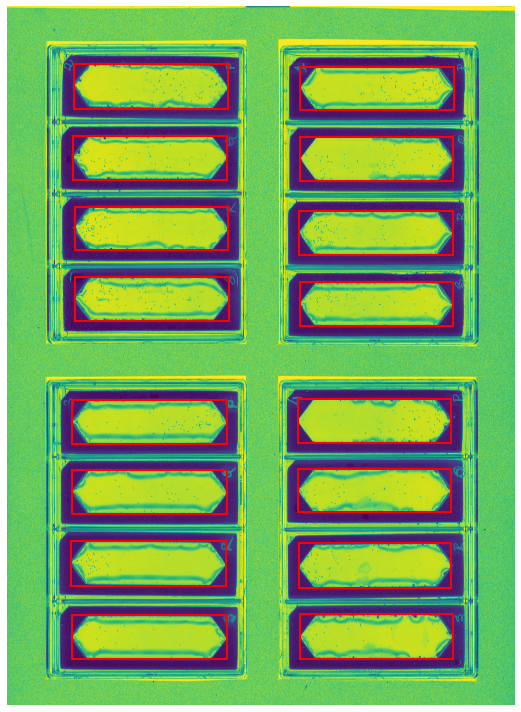

In [61]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.imshow(image)
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 10000:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

5548

In [62]:

%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 12))
#ax.imshow(image_label_overlay)
oun = 0
for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox

    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor='red', linewidth=3)
    cropped_image = image[df_f.values[oun][3]:df_f.values[oun][5], df_f.values[oun][4]:df_f.values[oun][6]]
    #imsave(df_f.values[oun][0]+'.tif', cropped_image)
    gy, gx = np.gradient(cropped_image)
    gnorm = np.sqrt(gx**2 + gy**2)
    sharpness = np.average(gnorm)
    ax.add_patch(rect)
    plt.text(df_f.values[oun][2], df_f.values[oun][1], 'label:'+df_f.values[oun][0]+'\nSh:'+"%.2f"%sharpness,
        {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
         'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})


    oun += 1
ax.set_axis_off()
plt.tight_layout()
plt.title(File_nam, fontsize=20, color="red")
plt.show()
#fig.savefig('ER_'+File_nam+'.tif', dpi=100)

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


ValueError: Image size of 8281895x8272757 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x864 with 1 Axes>